# The hope of this code is to be able to do fundemental physics with simple force plate data


## Fundemental Physics:


    - Momentum Principle
    
    
## Things to include:
    - graphs +
    - integration for a single jump +
    - some animation of the forces
    - "Normalizization" +
    
    
    - long jump, broad jump +
    


In [19]:
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas as pd

## Read in data file and make data frame

In [20]:
filename='DoubleLegJump.txt'
amtidata = loadtxt(filename, dtype = float, delimiter = ',', skiprows = 0)
#df = pd.DataFrame(datafile)

In [21]:
headings = ['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz']



df = pd.DataFrame(amtidata, columns = headings)

## Graph to see what the data looks like

<IPython.core.display.Javascript object>


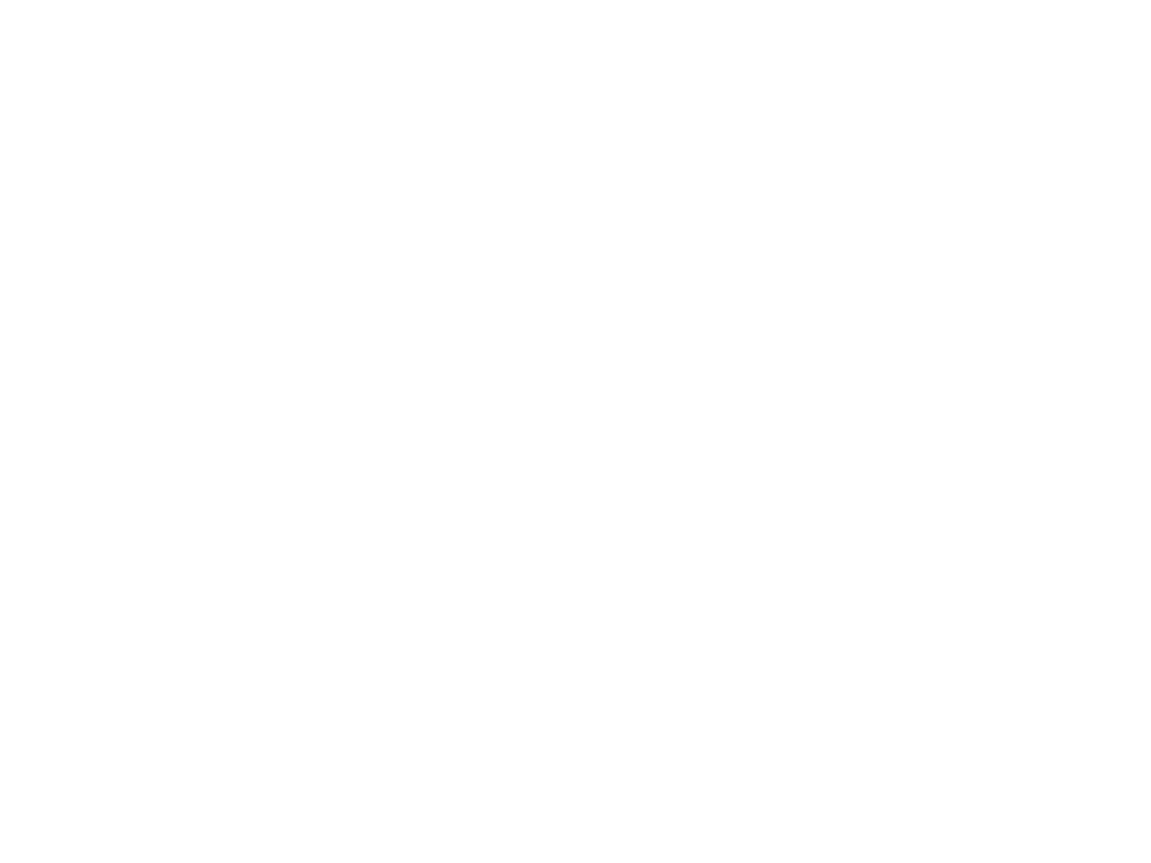

<IPython.core.display.Javascript object>


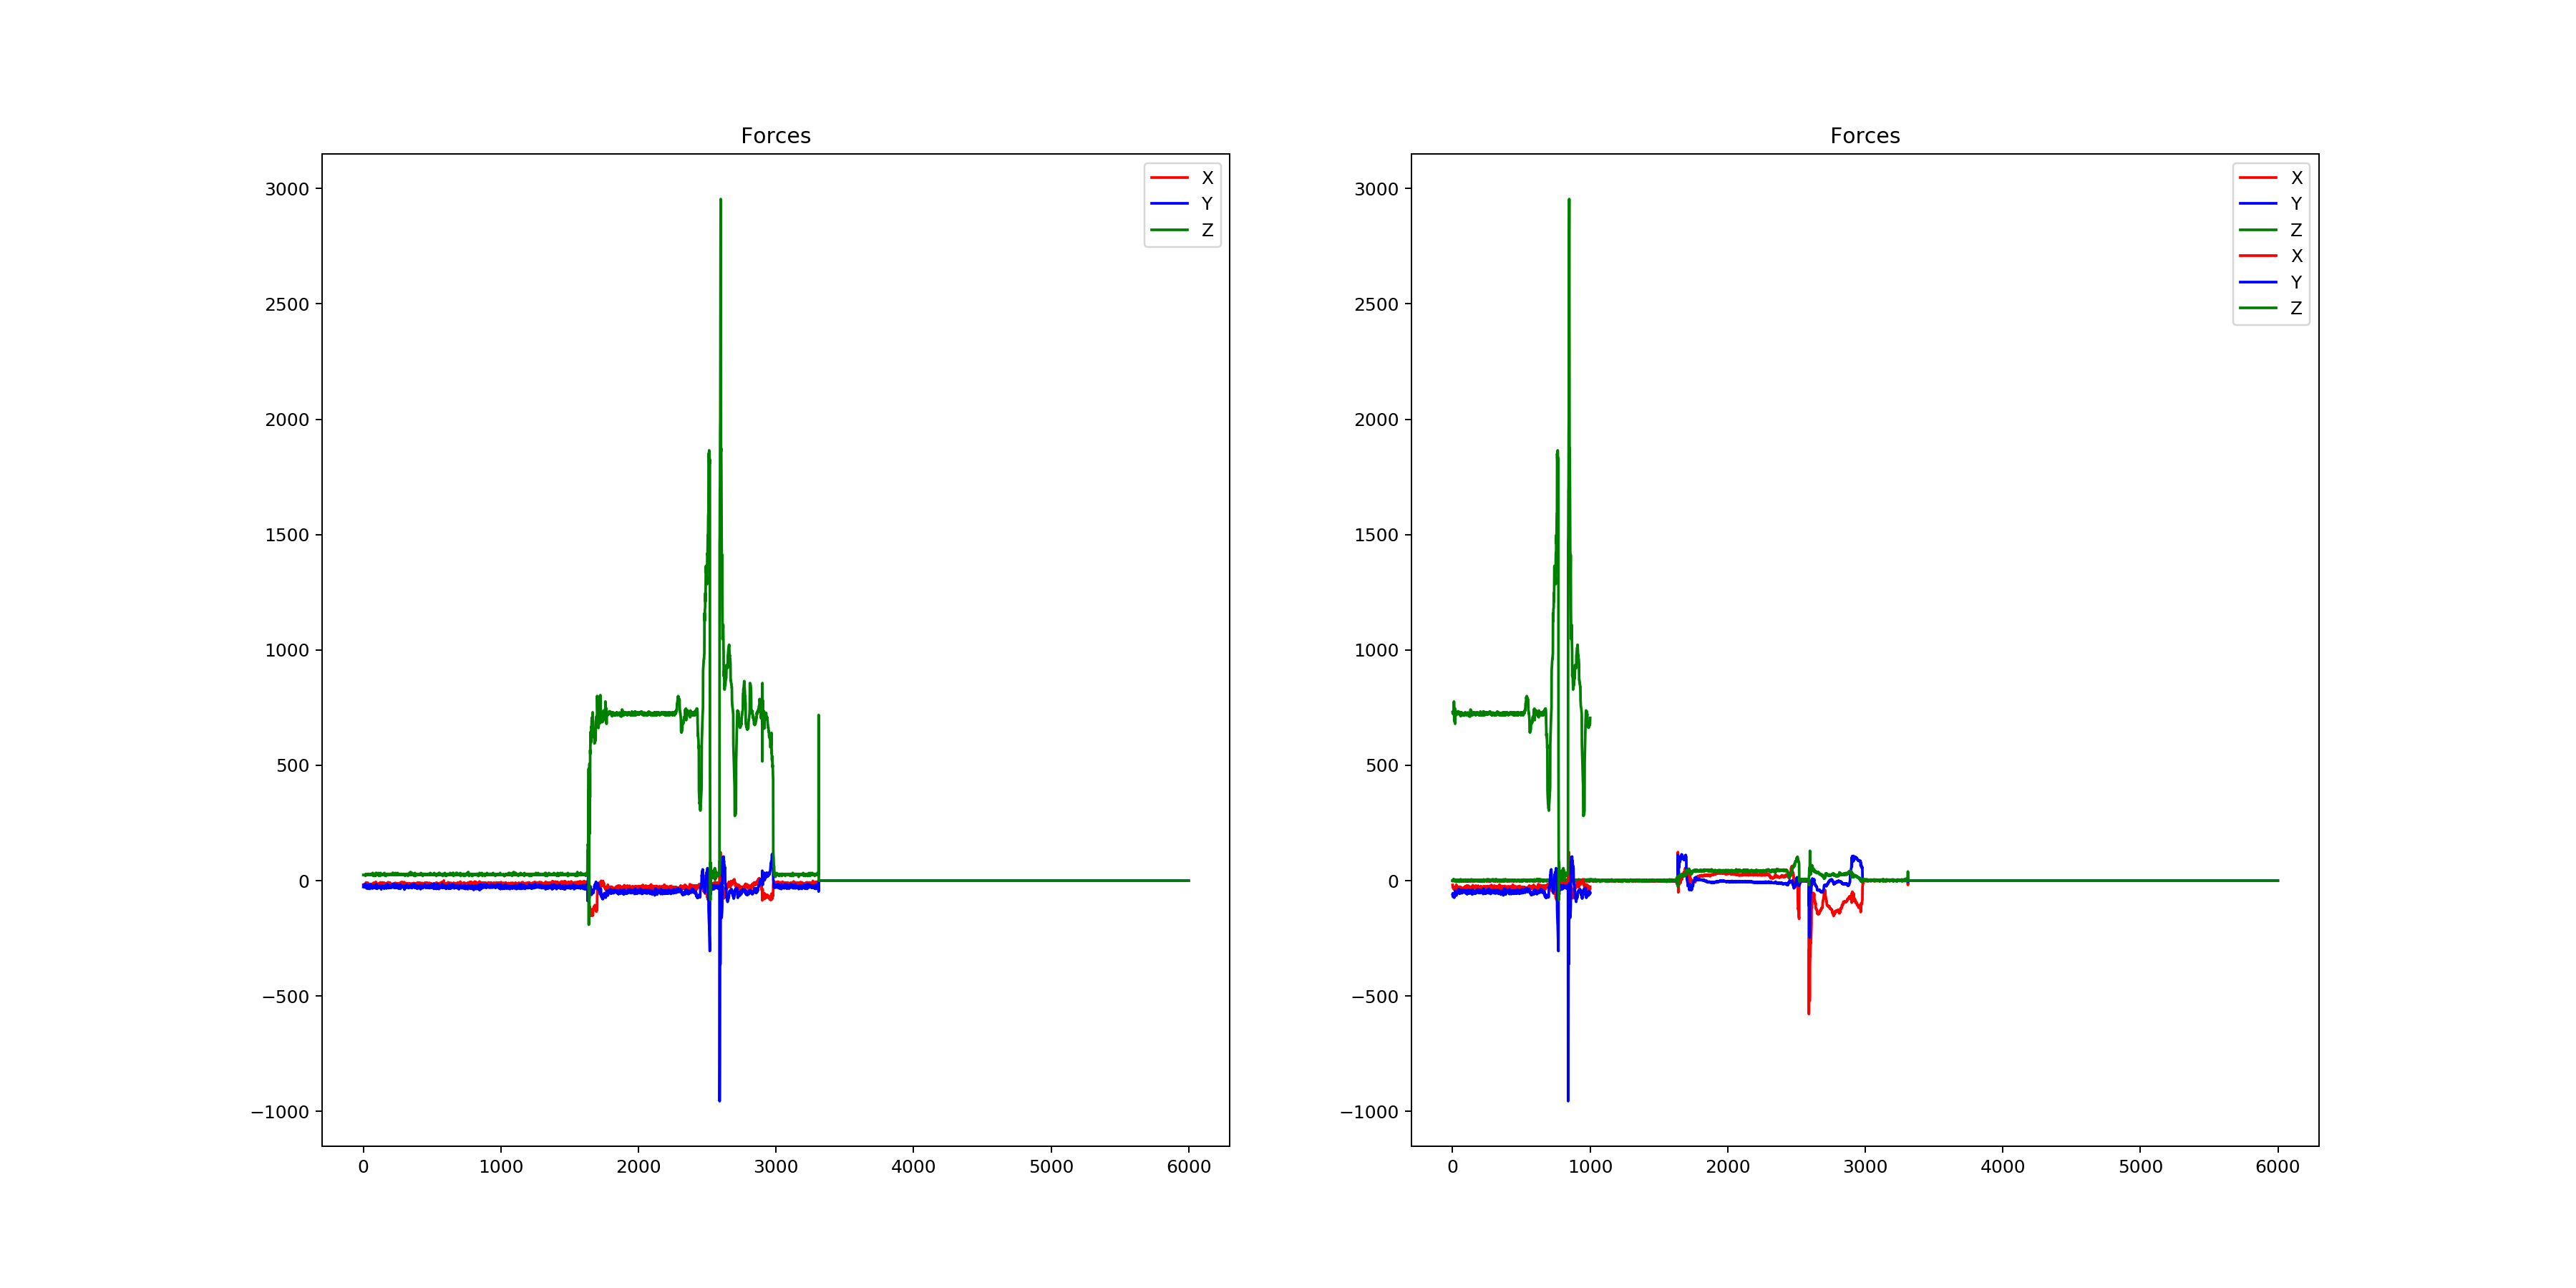

In [22]:
plt.figure()
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(df['Fx'], 'r', label = 'X')
plt.plot(df['Fy'], 'b', label = 'Y')
plt.plot(df['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Forces')


plt.subplot(1,2,2)
plt.plot(df['Mx'], 'r', label = 'X')
plt.plot(df['My'], 'b', label = 'Y')
plt.plot(df['Mz'], 'g', label = 'Z')
plt.legend()
plt.title('Moments')

#plt.tight_layout()
plt.legend()
plt.show()

## Trimming
... if needed...

In [23]:
df1 = df.copy()
df1 = pd.DataFrame(df1.loc[1750:2750,:], columns = headings) # by looking at the graph above, there is pleanty of data that I can trim off
N = df1.shape[0] # length of the new data frame just incase
time = np.arange(0, N, 1) # time array of the new data frame
df1.index = time # starts the index at zero 

plt.plot( df1['Fx'], 'r', label = 'X')
plt.plot( df1['Fy'], 'b', label = 'Y')
plt.plot( df1['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Forces')
plt.show()

## "Normalization"

Would need a baseline measurement of the subject standing on the plate. Take the average force of a section from that event. Then subtract that number from every data point. 

In [24]:
M = df1.loc[0:250,'Fz'].mean()

dfNorm = df1.copy()
dfNorm = pd.DataFrame(dfNorm, index = time, columns = headings)

for i in range(N):
    dfNorm['Fz'][i] = dfNorm['Fz'][i] - M
    i = i + 1
    

## Graph again

<IPython.core.display.Javascript object>


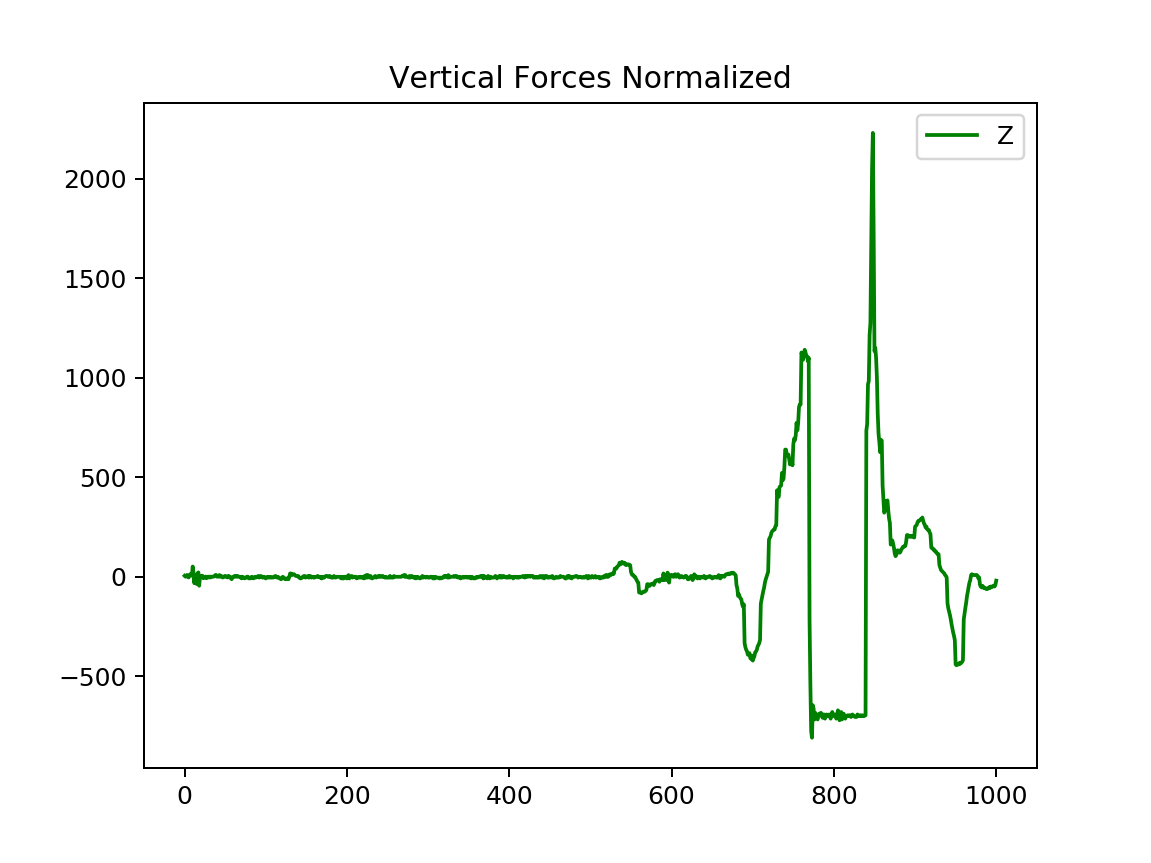

In [25]:
plt.figure()

#plt.subplot(1,2,1)
# plt.plot(dfNorm['Fx'], 'r', label = 'X')
# plt.plot(dfNorm['Fy'], 'b', label = 'Y')
plt.plot(dfNorm['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Vertical Forces Normalized')

plt.legend()
plt.show()

## Detecting Events

In [26]:
%matplotlib notebook

In [42]:
# Impulse = F*delta t

freq = 100
N = dfNorm.shape[0]
dp = np.zeros(N-1)
dt = 1/freq

slopes=np.gradient(dfNorm['Fz'])

        
# plt.figure()
# #plt.plot(indices,slopes, 'bx', label = 'slope')
# plt.plot(np.gradient(dfNorm['Fz']), 'bx', label = 'grad')
# plt.plot(dfNorm['Fz'], 'g', label = 'Z')
# plt.legend()
# plt.title('Slope')
# plt.legend()
# plt.show()


#find where jump starts by negative slope
gradval1=-50 #negative gradient value that indicates the start of a jump
index1=np.where(slopes<gradval1)[0][0] #first index with gradient less than gradval1

#find previous zero for the beginning of the jump
gradzero_threshold=0.8 #zero is within this threshold
vals=dfNorm['Fz'][:index1]
index0=np.max(np.where(abs(vals) < gradzero_threshold)[0]) #index of zero slope before the jump

#find steep negative slope for end of jump
gradval2=-M
index2=np.where(dfNorm['Fz']<gradval2)[0][0] #first index with gradient less than gradval2

J=0
#find impulse
for i in range(N-1):
    dp[i] = ((dfNorm['Fz'][i+1]+dfNorm['Fz'][i])/2)*dt
    if i > index0-1 and i < index2+1:
        J = J + dp[i]
    
print(J, 'kg m /s')

209.76651231294846 kg m /s


In [43]:
g = 9.8
m = M/g
#delta velocity
v = J/m

#average velocity
a = v/((index2-index0)*dt)
    
print(v, 'm/s')
print(a, 'm/s/s')

2.8380621365829435 m/s
2.652394520170975 m/s/s


<IPython.core.display.Javascript object>


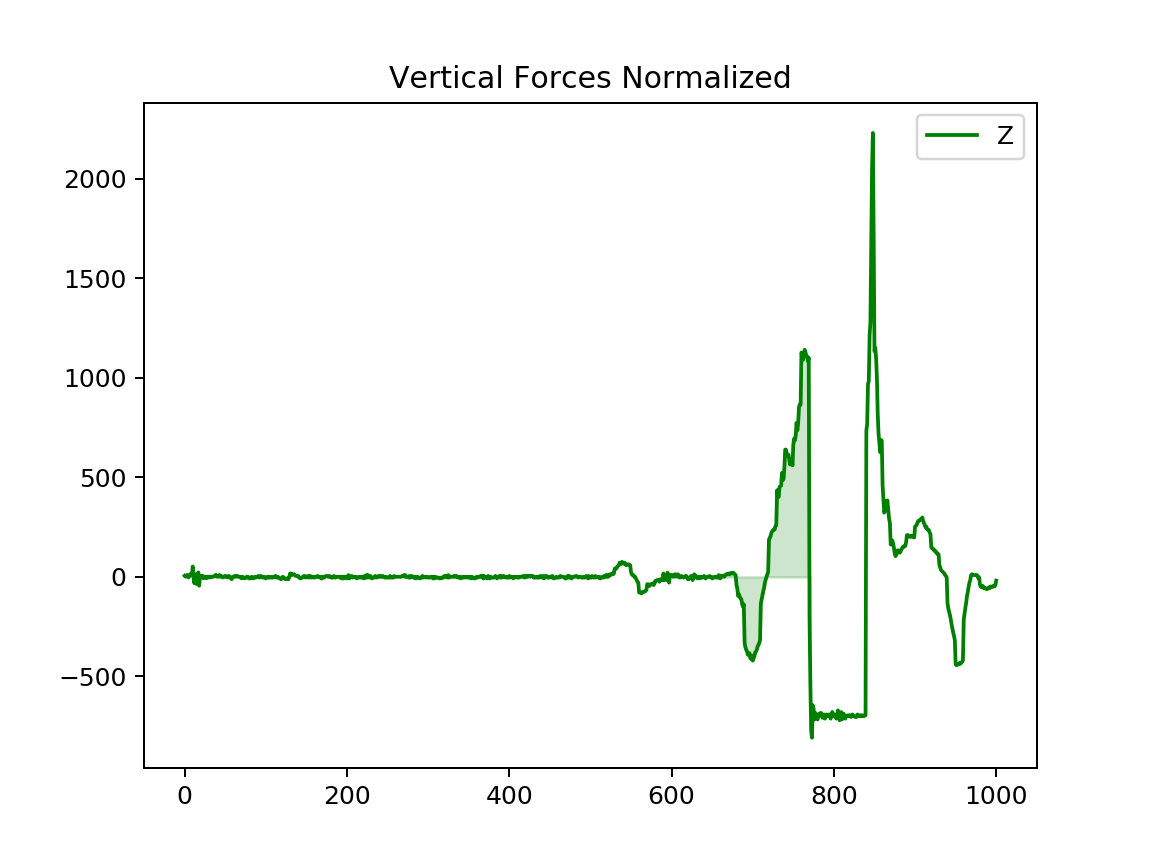

In [44]:
## Graph area under curve
plt.figure()
plt.plot(dfNorm['Fz'], 'g', label = 'Z')
plt.fill_between(range(index0,index2), dfNorm['Fz'][index0:index2], color='green', alpha = 0.2)
plt.legend()
plt.title('Vertical Forces Normalized')

plt.legend()
plt.show()

## Find Index for Zero Impulse

Use a Jupyter slider for interaction.

In [45]:
from ipywidgets import interactive

In [46]:
# create global variables that will maintain the value set by the slider after it is moved
index_begin=index0
index_end=index2
index_end_glob = index_end

def regraph(index_end):
    global index_end_glob
    index_end_glob = index_end
    plt.figure()
    plt.plot(dfNorm['Fz'], 'k', label = 'Z')
    plt.fill_between(np.arange(index_begin,index_end_glob), dfNorm['Fz'][index_begin:index_end_glob], color='green', alpha = 0.2)
    plt.xlim(index0-20,index2+20)
    J=calc_impulse()
    plt.title('total impulse = '+str(J))
    plt.show()
    
    
def calc_impulse():
    J=0
    dp = np.zeros(index_end_glob-index_begin-1)
    #find impulse
    for i in range(index_end_glob-index_begin-1):
        dp[i] = ((dfNorm['Fz'][index_begin+i+1]+dfNorm['Fz'][index_begin+i])/2)*dt
        J = J + dp[i]
    return J

In [47]:
interactive_plot = interactive(regraph, index_end=(index0+20, index2, 1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=728, description='index_end', max=772, min=685), Output(layout=Layout(he…

In [15]:
J=calc_impulse()
print('impulse = ', J, 'kg m/s')

impulse =  3.474898706573918 kg m/s


## Predicting Jump Height

Use momentum and energy to find velocity leaving the plate and the max height acheived

In [48]:
g = 9.8
m = M/g

Py = J #dPy = pf - pi... pi = 0
vf = Py/m # dv = vf - vi... vi = 0

k = (1/2)*m*vf**2
yf = k/(m*g) ## dy = yf -yi ... yi = 0

print(vf, 'm/s ... Final Velocity leaving the plate')
print(yf, 'meters ... peak height of COM displaced ')

2.8380621365829435 m/s ... Final Velocity leaving the plate
0.41094881077070106 meters ... peak height of COM displaced 


### Max Force Produced

In [49]:
Fmax = dfNorm.loc[0:780,'Fz'].max()
print(Fmax, 'N ... Max force produced')

1140.7581813545821 N ... Max force produced
